In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import cv2

In [ ]:
!pip install opencv-python

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



In [ ]:
#loading mnist data from keras

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

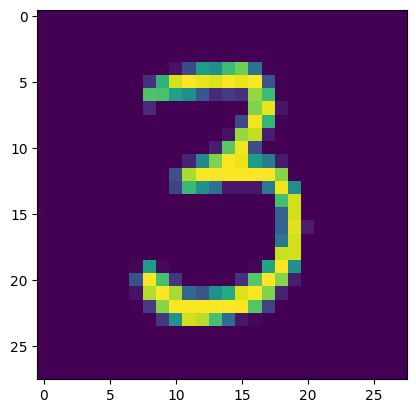

2


In [ ]:
plt.imshow(X_train[50])
plt.show()
#print the corresponding label
print(Y_train[25])

In [ ]:
#image labels Y_train.shape,Y_test.shape)

In [ ]:
# Unique values in Y_train
print(np.unique(Y_train))
# unique values in y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#we can use these labels as such or we can can also apply one hot encoding All the images have the same dimensions in this datasets.if not, we have to resize all the images to a comman dimension

In [ ]:
# scaling the values
X_train=X_train/255
X_test=X_test/255

In [ ]:
# print 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#Building Nueral network

In [ ]:
# setting up the layers of the nueral network  # one another parameter as 3 for rgb
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid') # there are unique values 10
])

In [ ]:
# compiling the Neural Network
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# training the Neural Network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3094 - accuracy: 0.9101
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9576
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1061 - accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0843 - accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0710 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0451 - accuracy: 0.9850
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0396 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

In [ ]:
#Traing data accuracy=98.9%

In [ ]:
#Accuracy on test data

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9742
0.9742000102996826


In [ ]:
#test data accuracy=97.3%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


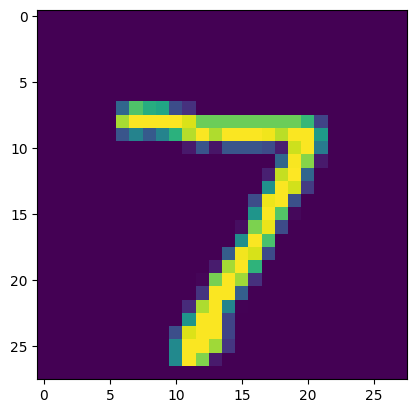

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[3.4130627e-04 8.5077742e-03 2.0925702e-01 6.8949902e-01 1.5754289e-04
 1.8966161e-02 1.9028881e-09 9.9999702e-01 3.1107792e-03 3.8198969e-01]


In [ ]:
#model.predict() gives the priction probability of each class for that data point

In [ ]:
# converting the prediction p probabilities to class label # argmax gives the index which having grater prob.
label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
#converting the preduction probabilities to class label for all test data label
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
#Y_test=True labels
#Y_pred_labels=predicted labels

In [ ]:
#confusion matrix
confusion_mat=confusion_matrix(Y_test,Y_pred_labels)
confusion_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    5,    2,    0,    3,    6,    1,    2,    0],
       [   0, 1123,    4,    1,    0,    1,    2,    0,    4,    0],
       [   4,    4, 1007,    5,    1,    2,    1,    5,    3,    0],
       [   0,    0,    6,  977,    0,   15,    0,    7,    3,    2],
       [   0,    0,    5,    0,  960,    0,    7,    1,    0,    9],
       [   3,    1,    1,    4,    0,  873,    3,    1,    1,    5],
       [   4,    1,    1,    1,    3,    6,  939,    0,    3,    0],
       [   1,    6,   14,    1,    1,    1,    0,  993,    3,    8],
       [   3,    1,    4,    8,    3,    8,    2,    4,  938,    3],
       [   3,    2,    0,    2,   18,    5,    1,    5,    2,  971]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted labels')

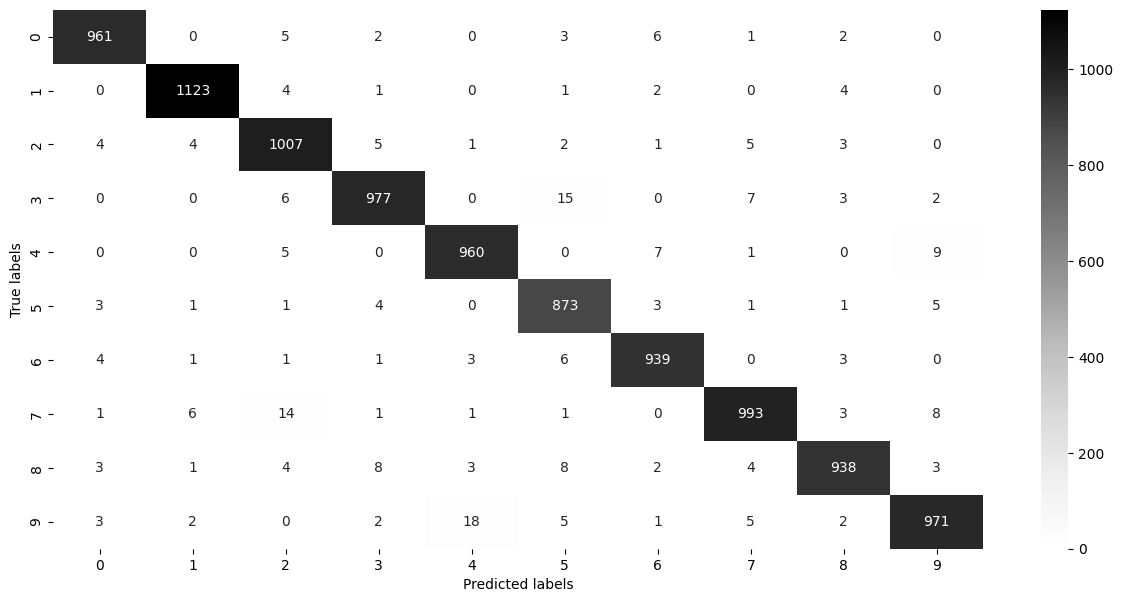

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_mat,annot=True,fmt='d',cmap='Greys')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

In [ ]:
#Building a productive System
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
import_image_path='/content/newimage.png'

In [ ]:
input_image=cv2.imread(import_image_path)

In [ ]:
type(input_image)

numpy.ndarray

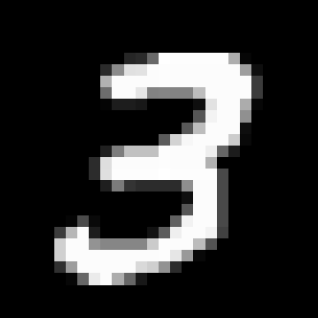

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

In [ ]:

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 22ms/step
[[4.5020290e-11 3.3499920e-05 7.7633333e-05 1.0000000e+00 4.6994154e-14
  8.0354512e-02 8.7665620e-14 4.8783012e-03 2.2127482e-05 6.6856915e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


In [ ]:
#Predictive System

Path of the image to be predicted: /content/newimage.png


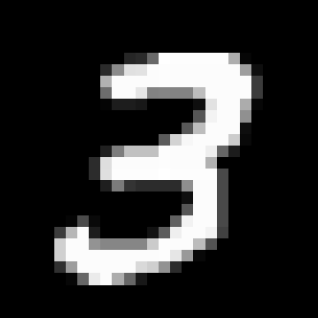

1/1 [==============================] - 0s 24ms/step
The Handwritten Digit is recognised as  3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ', input_pred_label)